
# Introduction

In this notebook,I analyzed and visualized data from the demographic information and what financial services are used by approximately 10,000 individuals across Tanzania.This data was extracted from the FSDT Finscope 2017 survey and prepared specifically for this challenge.Each individual was classified as mobile money only,mobile money with other services,non mobile money and non mobile money and other services.This was done to represent the relationship between financial services accessed and how often the mobile money services are used(non-mobile, mobile, both) and age, gender, marital status, land ownership and type of income.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
df = pd.read_csv("training.csv",index_col = 0)

In [3]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
ID,,,,,,,,,,,,,,,,,,,,,
5086,98,2,3,1,1,2,2,0,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1258,40,1,1,3,5,1,1,1,0,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
331,18,2,4,6,3,2,1,0,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
6729,50,1,1,3,1,1,1,0,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
8671,34,1,1,1,1,2,1,0,1,0,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3



Renaming columns of age,gender,maritual status,land ownership and income types


In [4]:
df.rename(columns = {
    "Q1": "Age",
    "Q2": "Gender",
    "Q3": "Maritual Status",
    "Q5": "Land Ownership", 
    "Q6": "Other land ownership", 
    "Q7": "Mobile Or Non mobile", 
    "Q8_1": "Salaries/Wages",
    "Q8_2": "Food Producer",
    "Q8_3": "Service Provider", 
    "Q8_4": "Parttime Occupation", 
    "Q8_5": "Rental Income", 
    "Q8_6":  "Investments", 
    "Q8_7": "Pension",
    "Q8_8": "Grant",
    "Q8_9": "Dependent On Others", 
    "Q8_10": "No Income",
    "Q8_11": "Other",
    "Q16": "Mobile Money Purchase", 
    "Q17": "Mobile Money Bills"
}, inplace = True)

Below I checked the data type and my colums to check if there's nothing I'm not expecting.


In [5]:
#Checking columns
df.columns

#Checking data types
df.dtypes

Age                              int64
Gender                           int64
Maritual Status                  int64
Q4                               int64
Land Ownership                   int64
Other land ownership             int64
Mobile Or Non mobile             int64
Salaries/Wages                   int64
Food Producer                    int64
Service Provider                 int64
Parttime Occupation              int64
Rental Income                    int64
Investments                      int64
Pension                          int64
Grant                            int64
Dependent On Others              int64
No Income                        int64
Other                            int64
Q9                               int64
Q10                              int64
Q11                              int64
Q12                              int64
Q13                              int64
Q14                              int64
Q15                              int64
Mobile Money Purchase    

Now that I know the data types and which columns I wanna work with,I am gonna get rid of the columns that I do not need by droping all unneeded columns to make it easier to work with the needed dataframe.

In [6]:
df.drop(["Q4",
         "Q9",
         "Q10",
         "Q11",
         "Q12", 
         "Q13", 
         "Q14", 
         "Q15", 
         "Q18",
         "Q19",
         "Latitude",
         "Longitude"], axis=1 , inplace = True)
df


,Age,Gender,Maritual Status,Land Ownership,Other land ownership,Mobile Or Non mobile,Salaries/Wages,Food Producer,Service Provider,Parttime Occupation,...,Dependent On Others,No Income,Other,Mobile Money Purchase,Mobile Money Bills,mobile_money,savings,borrowing,insurance,mobile_money_classification
ID,,,,,,,,,,,,,,,,,,,,,
5086,98,2,3,1,2,2,0,0,0,0,...,1,0,0,1,-1,0,0,0,0,0
1258,40,1,1,5,1,1,1,0,0,0,...,0,0,0,4,4,1,1,1,0,3
331,18,2,4,3,2,1,0,0,0,0,...,1,0,0,1,-1,1,0,0,0,2
6729,50,1,1,1,1,1,0,0,0,1,...,0,0,0,4,-1,1,0,1,0,3
8671,34,1,1,1,2,1,0,1,0,0,...,0,0,0,1,-1,1,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8378,57,2,3,1,2,2,0,1,0,0,...,1,0,0,1,-1,0,1,0,0,1
881,32,1,1,3,1,1,0,1,0,0,...,0,0,0,5,-1,1,1,0,0,3
6672,22,2,3,3,2,2,0,1,0,1,...,0,0,0,1,-1,0,0,0,0,0




# Missing Data



# 1.Examine the dataset. Are there any missing observations or columns where the data do not seem valid?

In [7]:
#Finding missing observations

df.isnull().sum()

Age                            0
Gender                         0
Maritual Status                0
Land Ownership                 0
Other land ownership           0
Mobile Or Non mobile           0
Salaries/Wages                 0
Food Producer                  0
Service Provider               0
Parttime Occupation            0
Rental Income                  0
Investments                    0
Pension                        0
Grant                          0
Dependent On Others            0
No Income                      0
Other                          0
Mobile Money Purchase          0
Mobile Money Bills             0
mobile_money                   0
savings                        0
borrowing                      0
insurance                      0
mobile_money_classification    0
dtype: int64

There are no missing values in this dataFrame

# 2.Get basic descriptive statistics for the dataset.



Finding the basic descriptive statistics of the dataset.

In [8]:
df.describe()


,Age,Gender,Maritual Status,Land Ownership,Other land ownership,Mobile Or Non mobile,Salaries/Wages,Food Producer,Service Provider,Parttime Occupation,...,Dependent On Others,No Income,Other,Mobile Money Purchase,Mobile Money Bills,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,38.239498,1.559910,1.787426,2.548915,1.840569,1.397942,0.062165,0.630110,0.058077,0.337327,...,0.156752,0.057795,0.001269,1.951508,-0.431914,0.553989,0.461517,0.432901,0.151255,1.799267
std,16.332148,0.496433,1.165160,1.534257,0.366103,0.489508,0.241472,0.482809,0.233906,0.472831,...,0.363593,0.233372,0.035598,1.580819,1.489879,0.497112,0.498552,0.495512,0.358322,1.196955
min,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,35.000000,2.000000,1.000000,3.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,48.000000,2.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,3.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,3.000000
max,100.000000,2.000000,4.000000,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000


7094 interviews were made in total.

Finding total number of people who were interviewed(male and female)

In [9]:
#Total of male and female

Male = df[df["Gender"] == 1]
Female = df[df["Gender"] == 2]

Male.describe()
Female.describe()



,Age,Gender,Maritual Status,Land Ownership,Other land ownership,Mobile Or Non mobile,Salaries/Wages,Food Producer,Service Provider,Parttime Occupation,...,Dependent On Others,No Income,Other,Mobile Money Purchase,Mobile Money Bills,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,3972.000000,3972.0,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,...,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,37.479607,2.0,1.799345,2.687059,1.877392,1.478097,0.044058,0.594914,0.054632,0.286002,...,0.228852,0.084089,0.001259,1.821752,-0.496224,0.496224,0.424723,0.401309,0.153072,1.648036
std,16.084996,0.0,1.103220,1.485938,0.328028,0.499583,0.205251,0.490970,0.227290,0.451947,...,0.420147,0.277556,0.035462,1.515122,1.392767,0.500049,0.494363,0.490225,0.360102,1.206876
min,16.000000,2.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,2.0,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,34.000000,2.0,1.000000,3.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,46.000000,2.0,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,3.000000
max,100.000000,2.0,4.000000,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000


Out of the 7094 interviews,there total number of males who were interviewed is 3122 and the total of females is 3972.

# 3.Create appropriate graphs to visually represent the relationship between financial services accessed (non-mobile, mobile, both) and age, gender, marital status, land ownership and type of income.

Classifying the rows in the dataframe for non mobile money users,mobile money users,non mobile or other and both mobile money and other in a new column

In [10]:


classification = []
for i in df["mobile_money_classification"]:
    if i == 0 or i ==1 :
        classification.append("Non_mobile_money")
        
    else:
        classification.append("Mobile_money")
        
        
        
df["classification"] = classification

In [11]:
Non_mobile_money_or_other = df[(df.mobile_money_classification == 0)]
Non_mobile_money = df[(df.mobile_money_classification == 1)]
Mobile_money_only = df[(df.mobile_money_classification == 2)]
Both = df[(df.mobile_money_classification == 3)]

Non_mobile_money_or_other
Non_mobile_money
Mobile_money_only 
Both


,Age,Gender,Maritual Status,Land Ownership,Other land ownership,Mobile Or Non mobile,Salaries/Wages,Food Producer,Service Provider,Parttime Occupation,...,No Income,Other,Mobile Money Purchase,Mobile Money Bills,mobile_money,savings,borrowing,insurance,mobile_money_classification,classification
ID,,,,,,,,,,,,,,,,,,,,,
1258,40,1,1,5,1,1,1,0,0,0,...,0,0,4,4,1,1,1,0,3,Mobile_money
6729,50,1,1,1,1,1,0,0,0,1,...,0,0,4,-1,1,0,1,0,3,Mobile_money
8671,34,1,1,1,2,1,0,1,0,0,...,0,0,1,-1,1,1,0,1,3,Mobile_money
4886,31,2,1,1,2,1,0,1,0,0,...,0,0,1,-1,1,1,1,1,3,Mobile_money
621,23,2,4,5,2,1,0,0,1,0,...,0,0,5,1,1,1,0,0,3,Mobile_money
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4860,36,2,2,5,2,1,0,1,0,1,...,0,0,1,1,1,1,1,0,3,Mobile_money
24,24,1,1,4,2,1,0,1,0,0,...,0,0,2,-1,1,1,0,0,3,Mobile_money
5546,25,1,1,1,2,1,0,1,0,1,...,0,0,1,-1,1,1,1,0,3,Mobile_money


Maping for mobile money classification

In [12]:
mobile_money_classification = {0 : "Non mobile money or other", 1 : "Non mobile money", 2 : "Mobile money only", 3 : "Both"}
df["mobile_money_classification"] = df["mobile_money_classification"].map(mobile_money_classification)



Visualising data for (non mobile money,mobile money and both) and Age

In [27]:
Age_interval = (pd.cut(df["Age"],[15, 24,35, 44,55,64,75,84,100]).value_counts())
Age_interval

(24, 35]     2249
(15, 24]     1535
(35, 44]     1145
(44, 55]     1009
(55, 64]      518
(64, 75]      430
(75, 84]      147
(84, 100]      61
Name: Age, dtype: int64

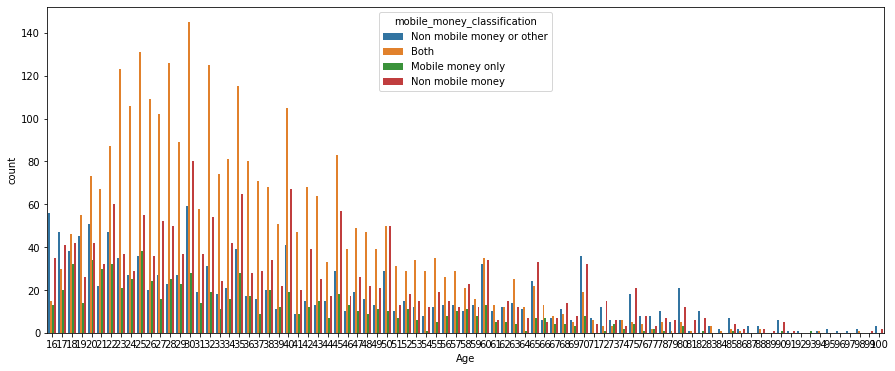

In [28]:
plt.figure(figsize = (15, 6))
sns.countplot(x = "Age", hue = "mobile_money_classification", data = df)

Maping for gender

In [14]:
gender = { 1: "Male", 2: "Female"}
df["Gender"] = df["Gender"].map(gender)




Visualising data for (non mobile money,mobile money and both) and gender

In [15]:
# Checking the gender of non mobile money,mobile money and both



From the graph it's clear that more females were interviewed and there are more female who don't use mobile money.Although there number of male and females who use mobile money is more or less the same and there are more femeles who use both mobile money and other financial services than males.

Maping for Maritual Status

In [16]:
Married = df[df["Maritual Status"] == 1]
Divorced = df[df["Maritual Status"] == 2]
Widowed = df[df["Maritual Status"] == 3]
Single = df[df["Maritual Status"] == 4]


Maritual_Status = {1: "Married", 2: "Divorced", 3: "Widowed", 4:"Single"}
df["Maritual Status"] = df["Maritual Status"].map(Maritual_Status)

Visualising data for (non mobile money,mobile money and both) and maritual status

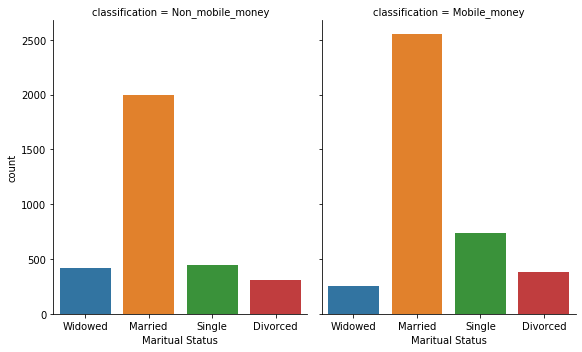

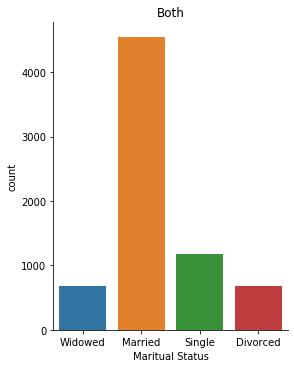

In [17]:
# Checking the maritual status of non mobile money,mobile money and both

_ = sns.catplot(x = "Maritual Status",kind = "count" , col = "classification" ,aspect=.8, data = df).set(xlabel = "Maritual Status")
_ = sns.catplot(x = "Maritual Status",kind = "count",aspect =.8, data = df).set(title = "Both" ,xlabel = "Maritual Status")

Looking at the graphs above I can see that a lot of the interviewed people were married hence they are the ones who have there highest count in all classifications.

Mapping for Land Ownership


In [18]:
Landowner = df[df["Land Ownership"] == 1]
Sharing_land = df[df["Land Ownership"] == 2]
Household_member_owns_land = df[df["Land Ownership"] == 3]
Renting = df[df["Land Ownership"] == 4]
Owns_no_land = df[df["Land Ownership"] == 5]
Unknown = df[df["Land Ownership"] == 6]

Landownership = {1 : "Landowner", 2 : "Sharing_land", 3 : "Household_member_owns_land", 4 : "Renting", 5 : "Owns_no_land", 6 : "Unknown" }

df["Land Ownership"] = df["Land Ownership"].map(Landownership)

Visualising data for (non mobile money,mobile money and both) and Land Ownership


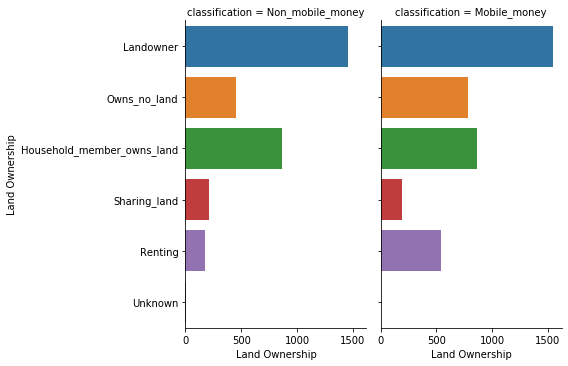

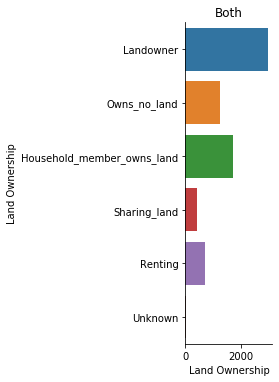

In [19]:
_ = sns.catplot(y = "Land Ownership",kind = "count", col = "classification" ,aspect=.8, data = df).set(xlabel = "Land Ownership")
_ = sns.catplot(y = "Land Ownership",kind = "count",aspect =.8, data = df).set(title = "Both" ,xlabel = "Land Ownership")

Looking at the graphs it is clear that more people own land and alot of use mobile money,whiule a few use both mobile money and other financial services.

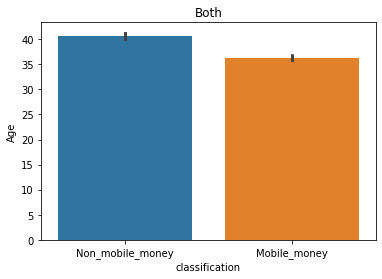

In [20]:
_= sns.barplot(y = "Age",  x = "classification" , data = df).set(xlabel = "Mobile_money_classification")
_= sns.barplot(y = "Age",  x = "classification" , data = df).set(title = "Both", ylabel = "Age")

From our graph it is clear that older people dont use mobile money as compared to younger people.

 # 4.Create appropriate graphs to visually represent the relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income.

Visualing data for the relationship between how often mobile services are used and Maritual Status.

Maping for Mobile Money Purchase 

In [21]:


mobile_money_purchase = { 
    -1 : "Not Applicable", 
    1 : "Never", 
    2 : "Daily", 
    3 : "Weekly", 
    4 : "Monthly", 
    5 : "Less Than Monthly"
}

df["Mobile Money Purchase"] = df["Mobile Money Purchase"].map(mobile_money_purchase)

Maping for Mobile Money Bills


In [22]:
mobile_money_bills = {
    -1 : "Not Applicable", 
    1 : "Never", 
    2 : "Daily", 
    3 : "Weekly", 
    4 : "Monthly", 
    5 : "Less Than Monthly"
}
df["Mobile Money Bills"] = df["Mobile Money Bills"].map(mobile_money_bills)